<a href="https://colab.research.google.com/github/NBK-code/ARC/blob/main/RE_ARC_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/michaelhodel/re-arc.git

Cloning into 're-arc'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 60 (delta 25), reused 19 (delta 18), pack-reused 27 (from 1)
Receiving objects: 100% (60/60), 55.76 MiB | 35.62 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [5]:
import sys
sys.path.append("/content/re-arc")

In [7]:
from main import generate_dataset, demo_generator
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

In [8]:
generate_dataset(
    path = "out_rearc",
    seed = 42,
    n_examples = 4)

task 400/400, example 4/4: 100%|██████████| 400/400 [00:20<00:00, 19.26it/s]


In [9]:
ARC_PALETTE = np.array([
    [  0,   0,   0],   # 0 black
    [255,   0,   0],   # 1 red
    [  0, 255,   0],   # 2 green
    [255, 255,   0],   # 3 yellow
    [  0,   0, 255],   # 4 blue
    [255,   0, 255],   # 5 magenta
    [  0, 255, 255],   # 6 cyan
    [255, 255, 255],   # 7 white
    [128, 128, 128],   # 8 gray
    [128,   0,   0],   # 9 dark red
], dtype=np.uint8)

ARC_CMAP = ListedColormap(ARC_PALETTE / 255.0, name="arc")
ARC_NORM = BoundaryNorm(np.arange(-0.5, 10.5, 1), ARC_CMAP.N)

In [10]:
def plot_grid(grid, title="", ax=None, cmap=ARC_CMAP, norm=ARC_NORM):
    arr = np.array(grid, dtype=int)
    if ax is None:
        fig, ax = plt.subplots(figsize=(3.2, 3.2))
    ax.imshow(arr, interpolation="nearest", cmap=cmap, norm=norm)
    ax.set_title(title)
    ax.set_xticks([]); ax.set_yticks([])
    # light cell borders
    h, w = arr.shape
    for x in range(w + 1):
        ax.axvline(x - 0.5, linewidth=0.5, color="white", alpha=0.6)
    for y in range(h + 1):
        ax.axhline(y - 0.5, linewidth=0.5, color="white", alpha=0.6)

In [11]:
def _extract_solution(solutions, j):
    """
    Accepts either:
      - list aligned to tests: solutions[j]
      - dict like {'test': [{'output': ...}, ...]}
    Returns the j-th solution grid or None.
    """
    if solutions is None:
        return None
    if isinstance(solutions, dict) and "test" in solutions:
        return solutions["test"][j]["output"]
    if isinstance(solutions, list):
        return solutions[j]
    return None

In [12]:
def visualize_task(task, solutions=None, *, show_train=True, show_test=True):
    """
    Usage:
      visualize_task(train_challenges["007bbfb7"])                       # only train pairs
      visualize_task(train_challenges["007bbfb7"], train_solutions["007bbfb7"])  # + solutions
    """
    trains = task.get("train", [])
    tests  = task.get("test", [])

    if show_train:
        for i, p in enumerate(trains, 1):
            fig, axes = plt.subplots(1, 2, figsize=(7.5, 3.5))
            plot_grid(p["input"],  f"Train {i} — INPUT",  ax=axes[0])
            plot_grid(p["output"], f"Train {i} — OUTPUT", ax=axes[1])
            plt.tight_layout(); plt.show()

    if show_test and tests:
        for j, t in enumerate(tests):
            sol = _extract_solution(solutions, j) if solutions is not None else None
            if sol is None:
                fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
                plot_grid(t["input"], f"Test {j+1} — INPUT", ax=ax)
                plt.tight_layout(); plt.show()
            else:
                fig, axes = plt.subplots(1, 2, figsize=(7.5, 3.5))
                plot_grid(t["input"], f"Test {j+1} — INPUT",    ax=axes[0])
                plot_grid(sol,        f"Test {j+1} — SOLUTION", ax=axes[1])
                plt.tight_layout()
                plt.show()

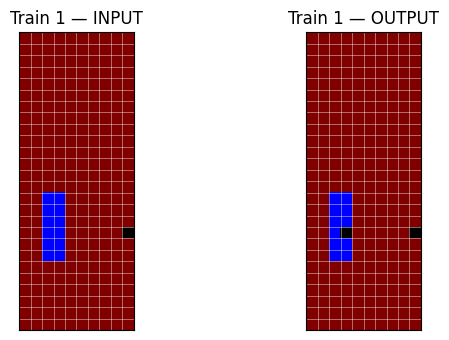

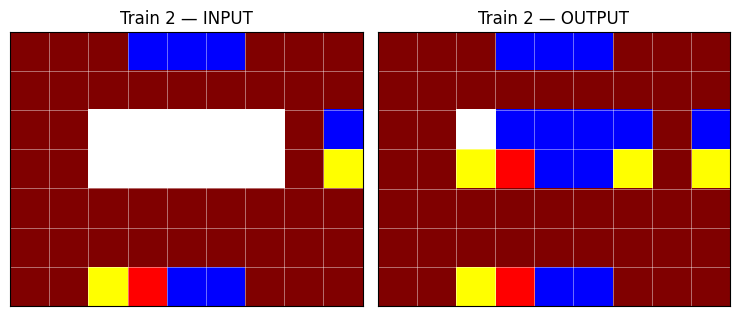

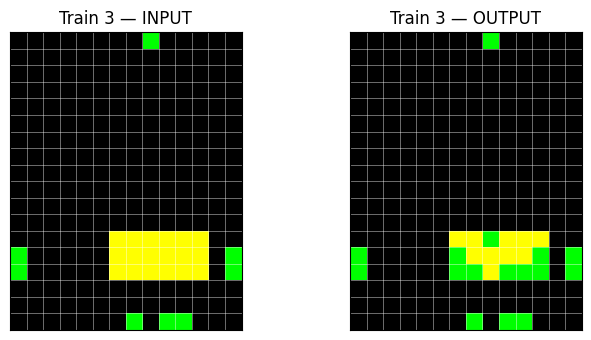

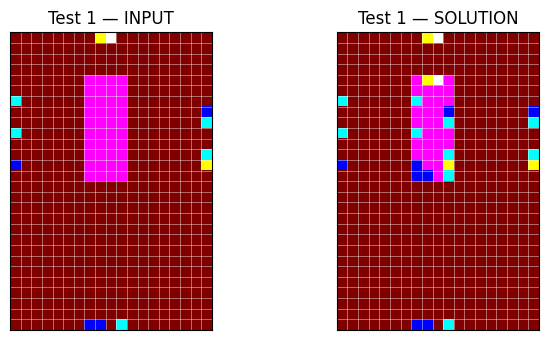

In [22]:
import json, random

def rearc_file_to_arc_task(path, n_train=2, n_test=1):
    pairs = json.load(open(path))
    random.shuffle(pairs)
    train_pairs = pairs[:n_train]
    test_pairs  = pairs[n_train:n_train+n_test]
    task = {
        "train": [{"input": p["input"], "output": p["output"]} for p in train_pairs],
        "test":  [{"input": p["input"]} for p in test_pairs],
    }
    solutions = {"test": [{"output": p["output"]} for p in test_pairs]}
    return task, solutions

task_path = "/content/out_rearc/tasks/1f642eb9.json"  # pick any file produced by generate_dataset
task, sols = rearc_file_to_arc_task(task_path, n_train=3, n_test=1)
visualize_task(task, sols)